In [52]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [16]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()


In [17]:
len(X_train)

60000

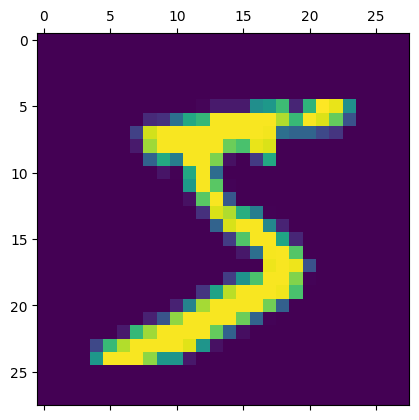

In [18]:
plt.matshow(X_train[0])

In [33]:
X_train=X_train/255
X_test=X_test/255

In [34]:
X_train_flat=X_train.reshape(len(X_train),28*28)
X_test_flat=X_test.reshape(len(X_test),len(X_test[0])*len(X_test[0]))

In [38]:
model=keras.Sequential([
    keras.layers.Dense(128,input_shape=(784,),activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
                       ])
model.compile(
    optimizer='RMSprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3522 - loss: 1.8869
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7969 - loss: 0.6579
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8697 - loss: 0.4490
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8896 - loss: 0.3824
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9037 - loss: 0.3370
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9154 - loss: 0.2907
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9235 - loss: 0.2641
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9293 - loss: 0.2402
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9345 - loss: 0.2213
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9428 - loss: 0.1965


In [39]:
model.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9381 - loss: 0.2117


[0.18761950731277466, 0.9452000260353088]

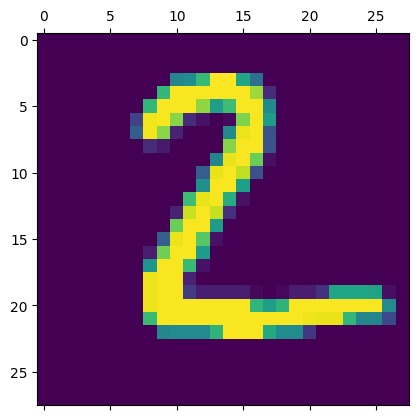

In [45]:
plt.matshow(X_test[1])

In [46]:
y_predicted=model.predict(X_test_flat)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3.0727626e-03, 5.9231979e-07, 9.8211354e-01, 1.3115460e-02,
       4.1704214e-12, 9.9492434e-04, 4.8664090e-04, 1.2989865e-11,
       2.1606918e-04, 4.7409847e-11], dtype=float32)

In [47]:
np.argmax(y_predicted[1])

np.int64(2)

In [49]:
y_pred_labels=[np.argmax(i) for i in y_predicted]
y_pred_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [50]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [51]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    3,    9,    1,    2,    1],
       [   0, 1110,    3,    2,    1,    1,    3,    2,   13,    0],
       [  10,    2,  976,    9,    6,    0,    7,    7,   14,    1],
       [   0,    1,   13,  963,    1,    6,    0,    8,   14,    4],
       [   1,    1,    6,    0,  940,    0,   11,    1,    7,   15],
       [   7,    2,    2,   29,    5,  793,   16,    1,   30,    7],
       [   6,    3,    1,    1,    9,    6,  925,    0,    7,    0],
       [   2,    7,   22,    8,    5,    1,    0,  961,    0,   22],
       [   4,    5,    3,   12,   10,    5,   11,    7,  915,    2],
       [  12,    7,    2,    6,   49,    3,    0,    9,   13,  908]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

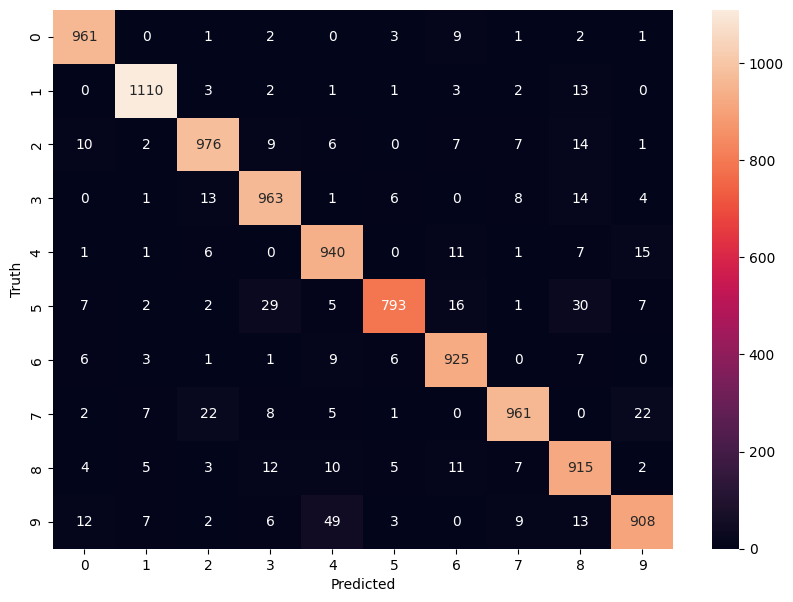

In [53]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
model.save('my_model.keras')